# Drexel University
## College of Computing and Informatics
## INFO 212: Data Science Programming I
## Assignment 2
### Due Date: Sunday, Nov. 3rd, 2024
### This assignment counts for 15% of the final grade

### A. Assignment Overview
This assignment provides the opportunity for you to practice with Python data analysis skills.

### B. What to Hand In

Sumbit a completed this Jupyter notebook.

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation.


# Your Name: Mustafa Bookwala

In [56]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Question [100 points]:

## Data Set to Use:
Download the data file "winemag-data-130k-v2.csv" and load it into a Pandas DataFrame using the column 0 as index. This data set contains 130k reviews for different wine verieties. It has the following columns:

1.	country: The country where the wine is from.
2.	description: A description or review of the wine.
3.	designation: The vineyard within the winery where the grapes that made the wine are from.
4.	points: The number of points WineMag rated the wine on a scale of 1-100.
5.	price: The cost for a bottle of the wine.
6.	province: The province or state where the wine is from.
7.	region_1: The wine-growing area in the province or state.
8.	region_2: Sometimes there are more specific regions specified within a wine-growing area.
9.	taster_name: Name of the taster.
10.	taster_twitter_handle: Twitter handle for the taster.
11.	title: The title of the wine review, which often contains the vintage.
12.	variety: The type of grapes used to make the wine.
13.	winery: The winery that made the wine.

In [55]:
df = pd.read_csv("/Users/mustafabookwala/Desktop/Drexel/Pre-Junior/Fall 2024/INFO 212/Week 5/winemag-data-130k-v2.csv")  # Loading the file as a dataframe using pandas
df.head()  # Getting the first 5 entries of the dataframe

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Data Analysis Task Description:
You are asked to use the dataset to identify the most promising country, region, and wine variety for launching a new winery. You will make a recommendation supported by visualizations and data analysis results.

## Data Analysis Activities:
Complete the following list of activities for the data analysis task. To complete each activity,
**You must write code or small programs with the following requirements:**
1. **write a description about what you are going to do**
2. **write the code with necessary comments**
3. **run the code to generate results**
4. **explain the results and plots in detail in separate Text cells**

1. Analyze the number of wine reviews by country and region. Can you estimate the market sizes of countries and regions? Is there any information about consumer interests that can be extracted from the review descriptions?

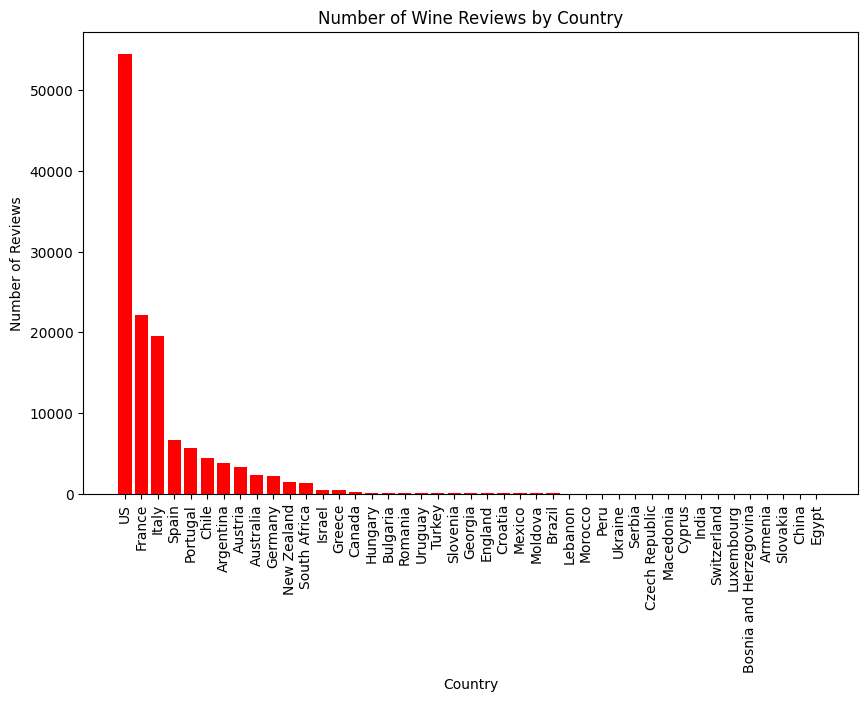

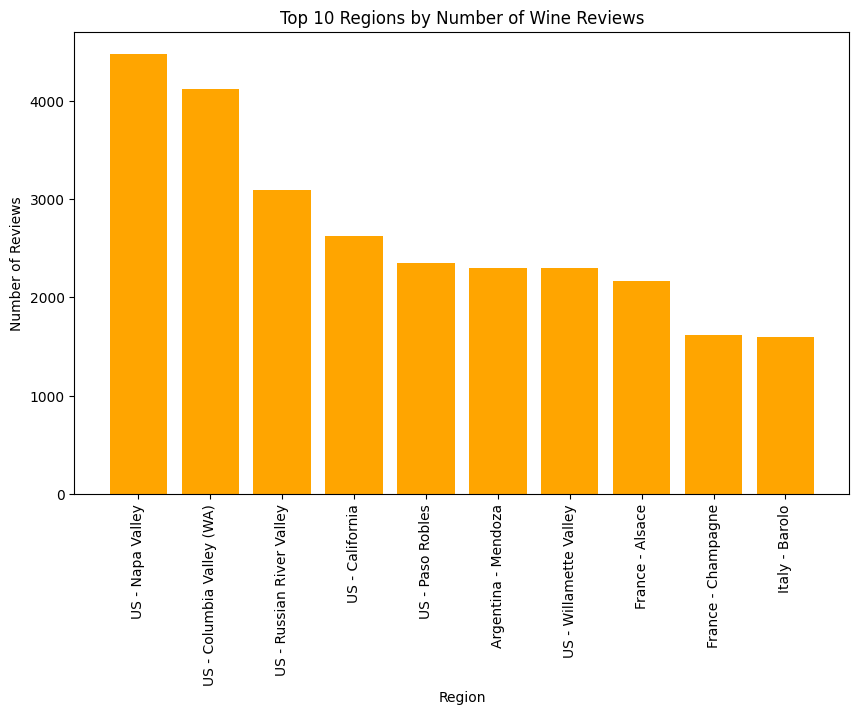

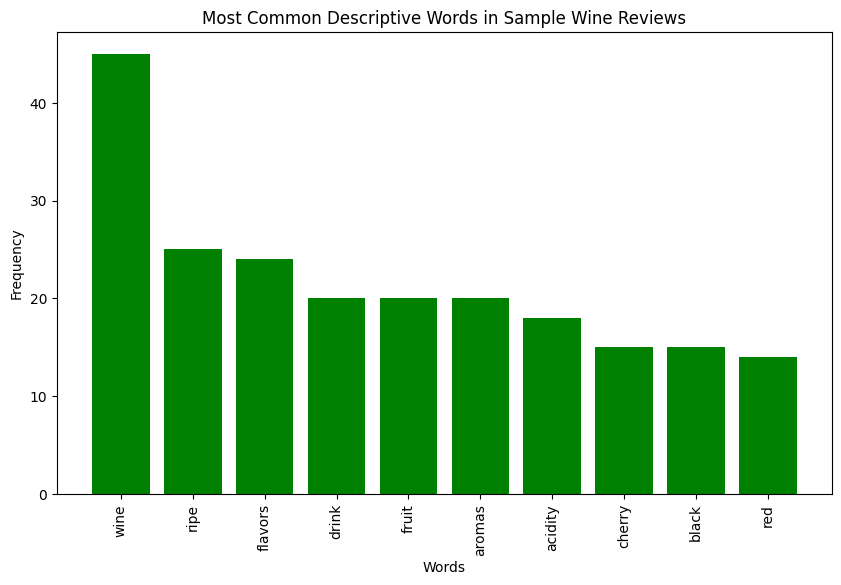

In [57]:
country_counts = df['country'].value_counts()  # Getting the countries with the number of reviews they have

plt.figure(figsize=(10, 6))  # Setting the figure size
plt.bar(country_counts.index, country_counts.values, color='red')  # Making a bar chart for country name (index) and the number of values (values). And giving the bar chart red color
plt.title('Number of Wine Reviews by Country')  # Displaying title of the graph
plt.xlabel('Country')  # Displaying the x-axis label
plt.ylabel('Number of Reviews') # Displaying the y-axis label
plt.xticks(rotation=90)  # Making sure the name of each country is visible by rotating them
plt.show()  # Displaying the graph

region_counts = df.dropna(subset=['country', 'region_1']).groupby(['country', 'region_1']).size().nlargest(10)  # First dropping those cells that don't have a country or region mentioned. Then, using the groupby function to get the region_1 of the respective countries. Then selecting only the largest 10 values.

region_labels = []  # Initializing an empty list to hold the labels

for index in region_counts.index:  # For loop runs through each index in region_counts
    label = "{} - {}".format(index[0], index[1])  # Concatenate country and region_1 with a dash in between
    region_labels.append(label)  # Appending to the empty list (region_labels)

plt.figure(figsize=(10, 6))  # Setting the figure size
plt.bar(region_labels, region_counts.values, color='orange')  # Making a bar chart for the regions (with their country) with the highest number of reviews
plt.title('Top 10 Regions by Number of Wine Reviews')  # Displaying the title of the graph
plt.xlabel('Region')  # Displaying the x-axis label
plt.ylabel('Number of Reviews')  # Displaying the y-axis label
plt.xticks(rotation=90)  # Making sure the names of the country-region_1 are visible by rotating them
plt.show()  # Displaying the graph


sample_descriptions = df['description'].dropna().sample(100, random_state=1)
words = " ".join(sample_descriptions).lower().split()  # Converting the descriptions to lowercase and splitting into words
common_words = ['and','from', 'the', 'of', 'with', 'this', 'but', 'are', 'for', 'is', 'its', 'has', 'as', 'it\'s', 'it', 'in', 'a', 'to', 's', 'on', 'that']  # Define common words to filter out. Added words to list until relevant wine words started to come up in the graph

wine_related_words = []  # Initializing an empty list to hold the relevant wine words

for word in words:  # For loop runs through all the words that were split
    if word not in common_words:  # Checks if the word is not in the common_words list
        wine_related_words.append(word)  # If above condition satisfied, then adds the relevant wine word to the wine_related_words list

word_counts = {}  # Initializing an empty dictionary to store word frequencies

for word in wine_related_words:  # For loop runs through each word in the list of relevant wine-related words
    if word in word_counts:  # Check if the word is already in the dictionary
        word_counts[word] += 1  # If above condition satisfied, increase its count by 1
    else:
        word_counts[word] = 1  # Else add it to the dictionary with a count of 1

word_items = list(word_counts.items())  # Converting the dictionary to a list of tuples (word, frequency) for sorting

# Define a helper function to get the frequency (second element) of each tuple
def get_count(item):
    return item[1]  # Returning the frequency count of the word

sorted_words = sorted(word_items, key=get_count, reverse=True)  # Sorting the list of word-frequency tuples by frequency in descending order

top_10_words = sorted_words[:10]  # Get the top 10 most common words

words, counts = zip(*top_10_words)
plt.figure(figsize=(10, 6))  # Displaying the graph
plt.bar(words, counts, color='green')  # Making a bar chart for the most common wine related words and its count
plt.title('Most Common Descriptive Words in Sample Wine Reviews')  # Displaying the title of the graph
plt.xlabel('Words')  # Displaying the x-axis label
plt.ylabel('Frequency')  # Displaying the y-axis label
plt.xticks(rotation=90)  # Making sure the words are visible by rotating them
plt.show()  # Displaying the graph

## Analysis

1. **Number of Reviews by Country and Region**:
   - The U.S. has the highest number of reviews, followed by France and Italy, which indicates a large wine market in these countries.
   - Popular wine regions within the U.S. are Napa Valley and Columbia Valley, while Alsace and Champagne are in France. High review counts in these areas depict they are key markets.

2. **Market Size Estimation**:
   - Countries and regions with a higher number of reviews likely have larger wine markets. The U.S., with the most reviews, depicts a strong consumer interest and market size.

3. **Consumer Interests from Review Descriptions**:
   - Common terms in reviews, like "flavors," "fruit," "aromas," "palate," and "acidity," show that consumers focus on taste, aroma, and texture. This shows that these qualities are important to wine enthusiasts and could guide marketing strategies.

2. Analyze the average rating by country and region. Based on the insights and other relevant informamtion available in the data set, describe reputation of winery locations.

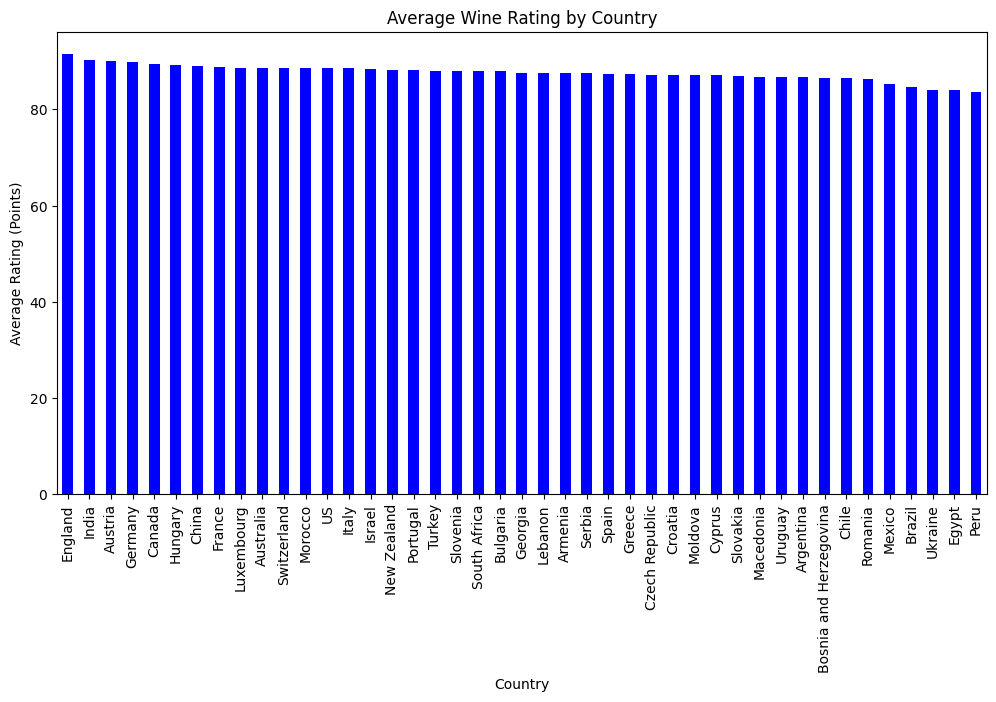

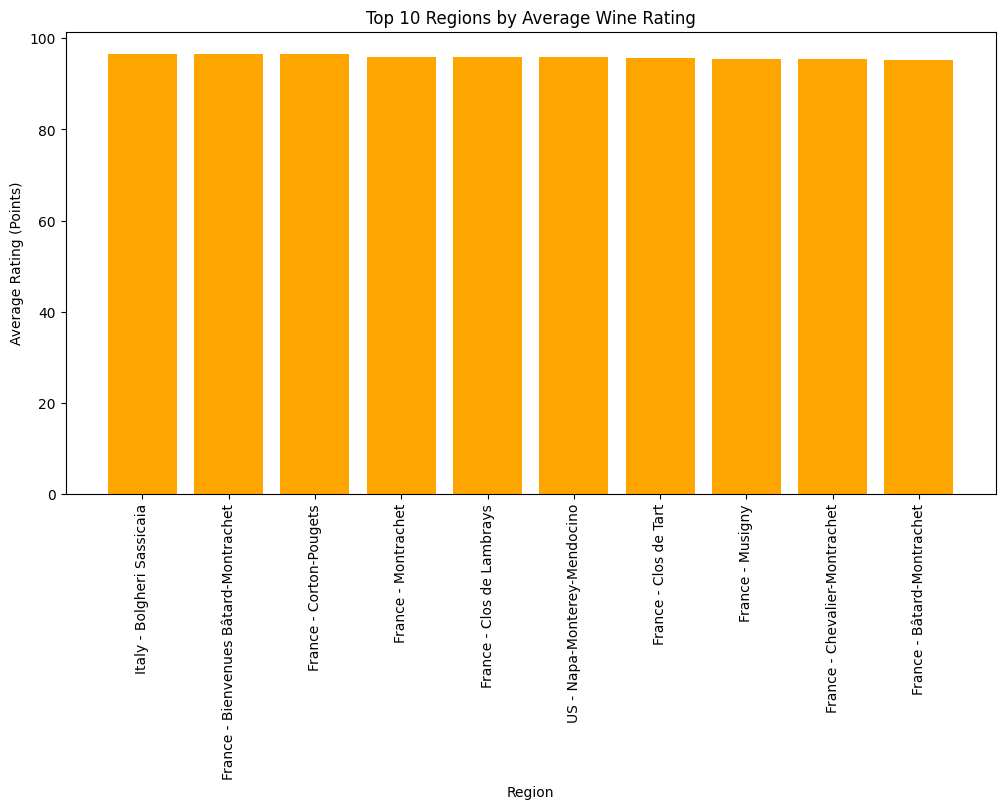

In [ ]:
# Grouping the data by 'country' and calculating the mean rating for each country, then sorting in descending order
avg_rating_by_country = df.groupby('country')['points'].mean().sort_values(ascending=False)

# Setting the figure size for the plot
plt.figure(figsize=(12, 6))

avg_rating_by_country.plot(kind='bar', color='blue')  # Plotting a bar chart to show average wine ratings by country
plt.title('Average Wine Rating by Country')  # Adding a title to the plot
plt.xlabel('Country')  # Labeling the x-axis
plt.ylabel('Average Rating (Points)')  # Labeling the y-axis
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.show()  # Displaying the plot

# Dropping rows with missing values in 'country', 'region_1', or 'points' columns
filtered_df = df.dropna(subset=['country', 'region_1', 'points'])

# Grouping the filtered data by both 'country' and 'region_1', calculating the mean rating, and selecting the top 10 regions
avg_rating_by_region = filtered_df.groupby(['country', 'region_1'])['points'].mean().sort_values(ascending=False).head(10)

# Creating labels that combine country and region names for the x-axis
region_labels = []
for index in avg_rating_by_region.index:
    label = "{} - {}".format(index[0], index[1])  # Formatting each label as "Country - Region"
    region_labels.append(label)

# Setting the figure size for the next plot
plt.figure(figsize=(12, 6))

# Plotting a bar chart to display the top 10 regions by average wine rating
plt.bar(region_labels, avg_rating_by_region.values, color='orange')
plt.title('Top 10 Regions by Average Wine Rating')  # Adding a title to the plot
plt.xlabel('Region')  # Labeling the x-axis
plt.ylabel('Average Rating (Points)')  # Labeling the y-axis
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.show()  # Displaying the plot


### Analysis

1. **Average Rating by Country**:
   - The first chart shows that some countries have higher average ratings, which implies that they’re known for producing quality wines. Countries like **France** and **Italy** have scored higher, reflecting their strong wine reputation.

2. **Top-Rated Regions within Countries**:
   - Certain regions, like **Bolgheri Sassicaia** in Italy and **Corton-Pougets** in France, stand out with high average ratings, highlighting their reputations for high-quality wine production.
   - High ratings in specific regions show the premium areas within those countries, making them a preferred choice for consumers looking for highly-rated wines.

3. Analyze wine varieties that consistently receive higher ratings across different regions. Based on the insights and other relevant information in the data set, describe popularity and consumer preference.

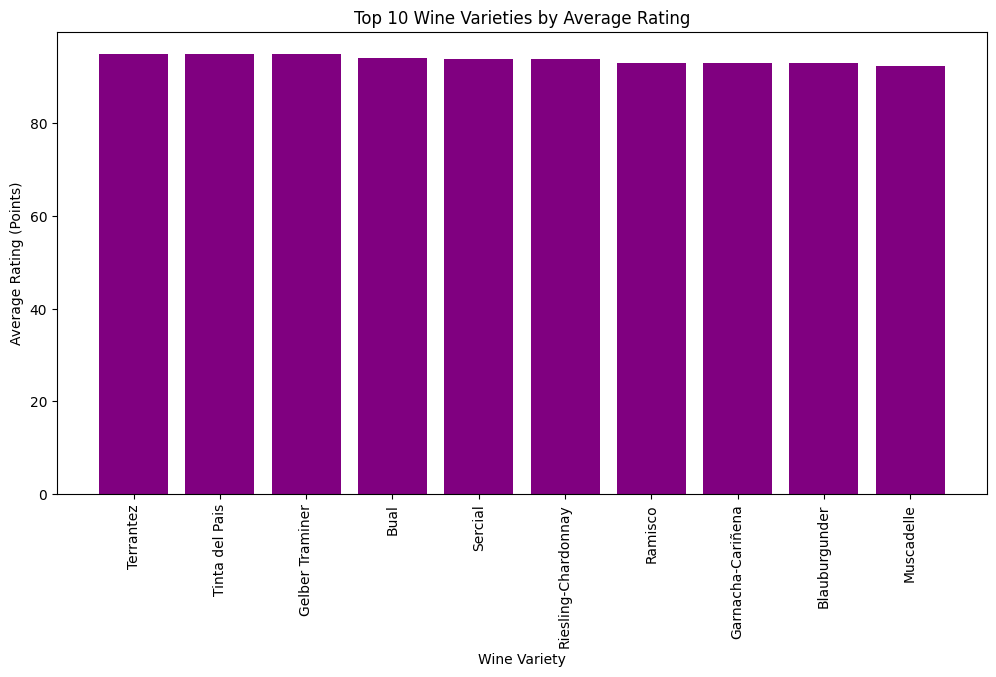

<Figure size 1400x800 with 0 Axes>

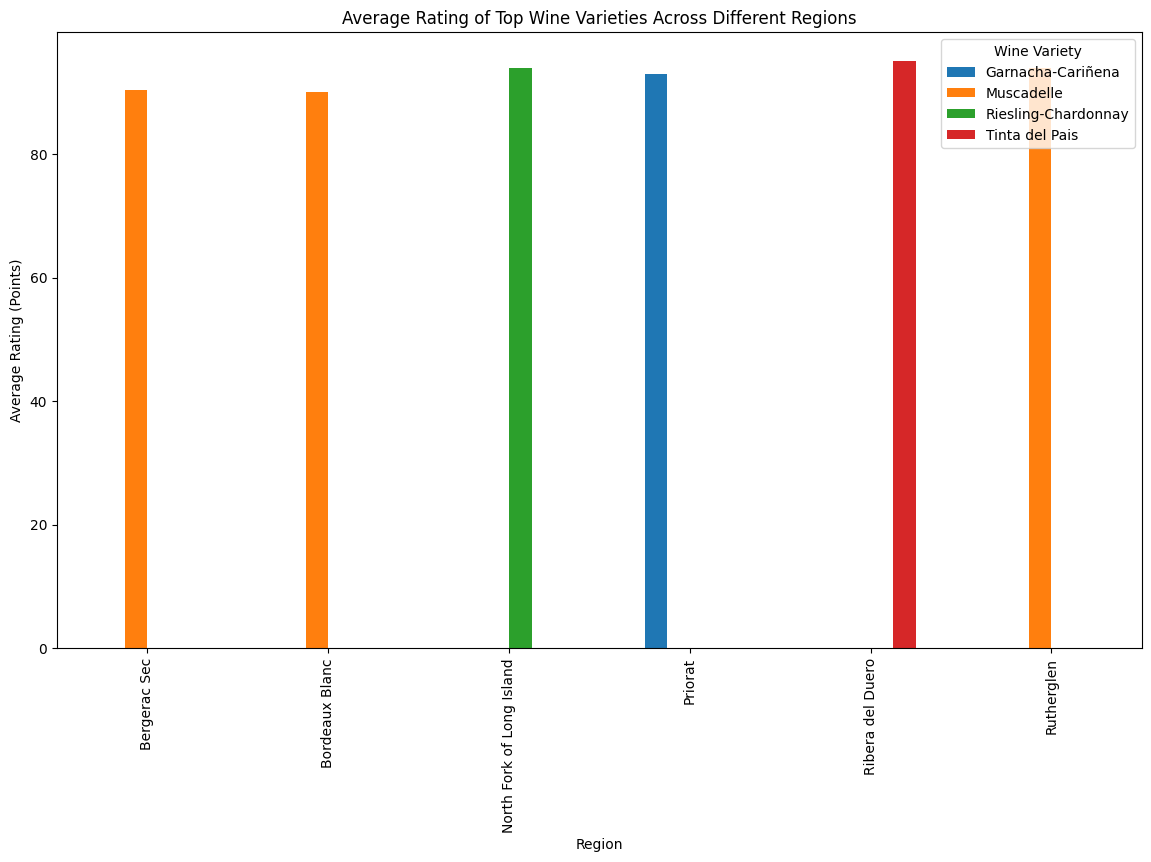

In [53]:
avg_rating_by_variety = df.groupby('variety')['points'].mean().sort_values(ascending=False).head(10)  # Grouping data by 'variety' and calculating the average rating (points) for each variety, then sorting in descending order and selecting the top 10 varieties

plt.figure(figsize=(12, 6))  # Setting the figure size for the plot

plt.bar(avg_rating_by_variety.index, avg_rating_by_variety.values, color='purple')  # Plotting a bar chart to display the top 10 wine varieties by average rating
plt.title('Top 10 Wine Varieties by Average Rating')  # Adding a title to the plot
plt.xlabel('Wine Variety')  # Labeling the x-axis
plt.ylabel('Average Rating (Points)')  # Labeling the y-axis
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.show()  # Displaying the plot

filtered_df = df.dropna(subset=['variety', 'region_1', 'points'])  # Dropping rows with missing values in 'variety', 'region_1', or 'points' columns to ensure complete data for further analysis

avg_rating_by_variety_region = filtered_df.groupby(['variety', 'region_1'])['points'].mean().reset_index()  # Calculating the average rating by grouping data by both 'variety' and 'region_1', then resetting the index for easier filtering

top_varieties = avg_rating_by_variety.index.tolist()  # Creating a list of top 10 wine varieties to filter the average ratings of these varieties across different regions
top_variety_region_ratings = avg_rating_by_variety_region[avg_rating_by_variety_region['variety'].isin(top_varieties)]

plt.figure(figsize=(14, 8))  # Setting the figure size for the next plot

pivot_data = top_variety_region_ratings.pivot(index='region_1', columns='variety', values='points')  # Pivoting the data to create a matrix where rows are regions, columns are wine varieties, and values are average ratings

pivot_data.plot(kind='bar', figsize=(14, 8))  # Plotting a bar chart with regions on the x-axis and average ratings of top wine varieties across different regions
plt.title('Average Rating of Top Wine Varieties Across Different Regions')  # Adding a title to the plot
plt.xlabel('Region')  # Labeling the x-axis
plt.ylabel('Average Rating (Points)')  # Labeling the y-axis
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.legend(title="Wine Variety")  # Adding a legend to identify each wine variety
plt.show()  # Displaying the plot

### Analysis

1. **Top Wine Varieties by Rating**:
   - The bar chart shows the **top 10 wine varieties** based on average ratings. These varieties, like **Terrantez** and **Tinta del Pais**, are highly rated, suggesting they are generally seen as higher quality or preferred by reviewers.

2. **Consistency Across Regions**:
   - The bar chart shows how these top varieties perform in different regions. Varieties with high ratings across multiple regions indicate broad appeal and popularity.
   - This consistency across regions means that consumers trust these varieties for quality, no matter the location. This insight helps to understand which wines are both popular and reliable, making them a more preferred choice for consumers.

4. Analyze the wine prices by country, region, and variety. Based on the insights and other relevant information in the data set, describe the potential profitability and market positioning of the wines based on their countries, regions, and varieties.

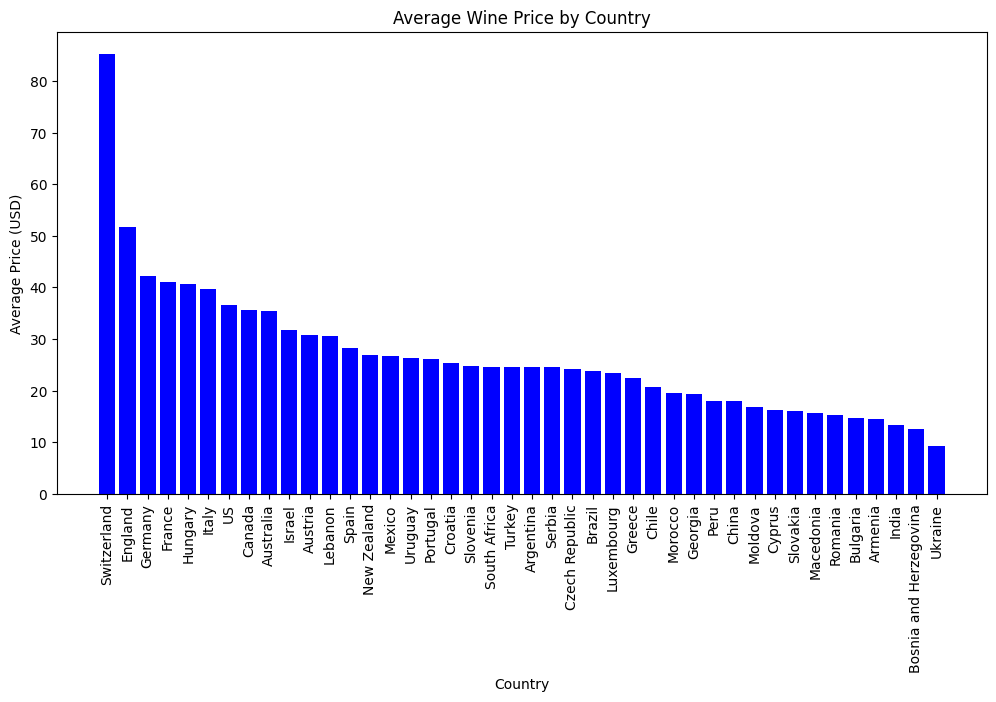

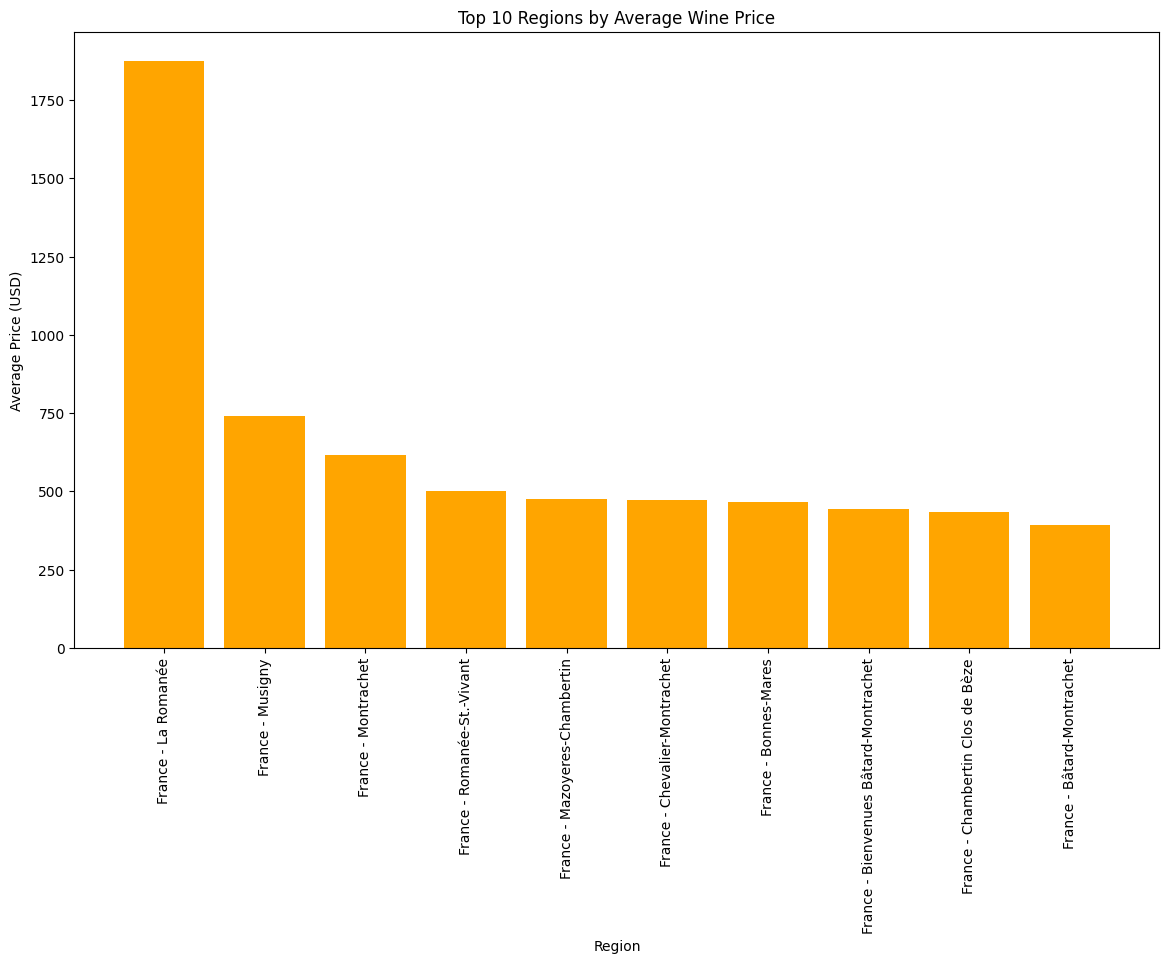

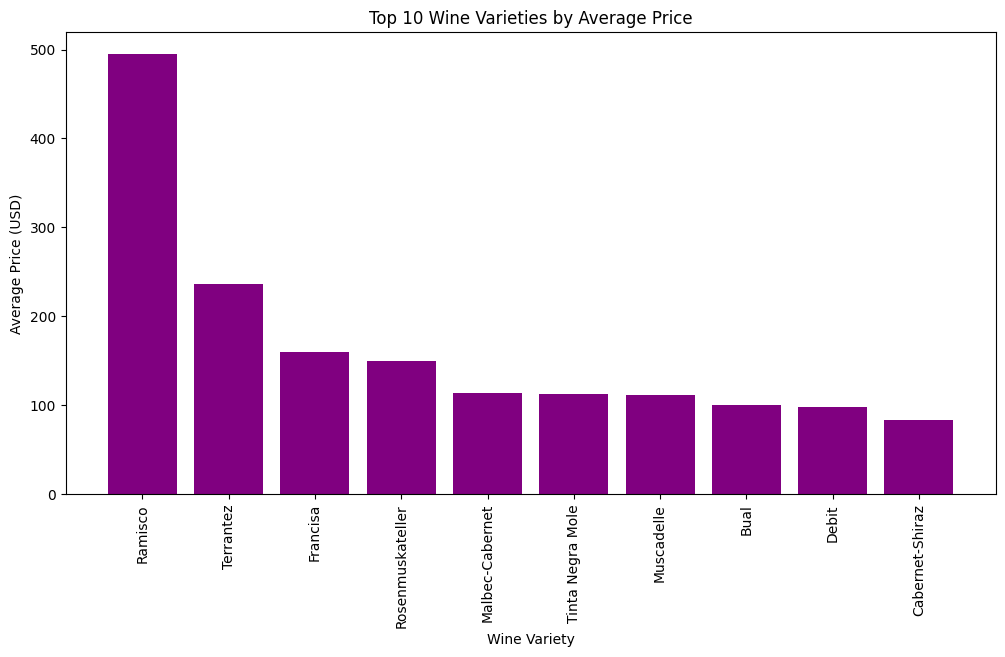

In [38]:
avg_price_by_country = df.groupby('country')['price'].mean().sort_values(ascending=False).dropna()  # Grouping data by 'country' and calculating the average price of wine for each country, then sorting in descending order and dropping rows with NaN values

plt.figure(figsize=(12, 6))  # Setting the figure size for the plot

plt.bar(avg_price_by_country.index, avg_price_by_country.values, color='blue')  # Plotting a bar chart to display the average wine price by country
plt.title('Average Wine Price by Country')  # Adding a title to the plot
plt.xlabel('Country')  # Labeling the x-axis
plt.ylabel('Average Price (USD)')  # Labeling the y-axis
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.show()  # Displaying the plot

filtered_df = df.dropna(subset=['country', 'region_1', 'price'])  # Dropping rows with missing values in 'country', 'region_1', or 'price' columns for complete data

avg_price_by_region = filtered_df.groupby(['country', 'region_1'])['price'].mean().sort_values(ascending=False).head(10)  # Grouping by both 'country' and 'region_1' to get the average wine price in each region, then sorting and selecting the top 10 regions

region_labels = []  # Creating labels that combine country and region names for the x-axis
for index in avg_price_by_region.index:
    label = "{} - {}".format(index[0], index[1])  # Formatting each label as "Country - Region"
    region_labels.append(label)

plt.figure(figsize=(14, 8))  # Setting the figure size for the next plot

plt.bar(region_labels, avg_price_by_region.values, color='orange')  # Plotting a bar chart to display the top 10 regions by average wine price
plt.title('Top 10 Regions by Average Wine Price')  # Adding a title to the plot
plt.xlabel('Region')  # Labeling the x-axis
plt.ylabel('Average Price (USD)')  # Labeling the y-axis
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.show()  # Displaying the plot

avg_price_by_variety = df.groupby('variety')['price'].mean().sort_values(ascending=False).head(10)  # Grouping data by 'variety' and calculating the average price of wine for each variety, then sorting and selecting the top 10 varieties

plt.figure(figsize=(12, 6))  # Setting the figure size for the plot

plt.bar(avg_price_by_variety.index, avg_price_by_variety.values, color='purple')  # Plotting a bar chart to display the top 10 wine varieties by average price
plt.title('Top 10 Wine Varieties by Average Price')  # Adding a title to the plot
plt.xlabel('Wine Variety')  # Labeling the x-axis
plt.ylabel('Average Price (USD)')  # Labeling the y-axis
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.show()  # Displaying the plot

### Analysis of Results

1. **Average Wine Price by Country**:
   - Countries like **Switzerland** and **England** have the highest average wine prices, indicating they are known for premium wines. Lower-priced countries, like **India** and **Ukraine**, may target budget-friendly consumers.

2. **Top Regions by Wine Price**:
   - Regions like **La Romanèe** and **Musigny** in **France** rank highest in price, indicating these are top luxury wine markets.

3. **Top Wine Varieties by Price**:
   - Wine varieties such as **Ramisco** and **Terrantez** are priced higher, indicating they are popular and viewed as premium wines.

Hence, high prices in countries like Switzerland and England and regions like La Romanèe suggest a luxury market. Higher-priced varieties, like Ramisco, have strong demand and profit potential.

## Final Recommendataion:
**Finally, you will write recommendations for launching a new winery.** Based on the above data analysis, recommend a country, region, and wine variety that offers the best balance of market size, reputation, profitability, consumer interests, and competitive positioning for launching a new winery. Be sure to support all selections, recommendations, and answers with relevant visualizations or evidence from your data analysis. You may reuse descriptions, code, visualizations, and results from the previous analysis, as well as any additional analyses you perform.

## Final Recommendation for Launching a New Winery

### Country: France
**France** stands out as the optimal country for launching a winery. It has a prestigious global reputation in winemaking, a well-established market, and a strong consumer base that values quality wines. This is inferred because France has the 2nd highest number of reviews and has the regions with themost expensive wine type depicting that the consumer base here is fond of wine and its variety.

### Region: Montrachet
Within France, **Montrachet** is the recommended region. Known for its high number of reviews, strong average wine rating, it is easy to infer that the consumers of this area will be wine enthusiasts and opening a winery here will only be a profitable business.

### Wine Variety: Muscadelle
**Muscadelle** is the perfect wine variety to focus on. It’s popular, versatile, and aligns well with what consumers want. Muscadelle has a high number of positive reviews and the highest average wine rating, making it a top choice in many regions. Plus, its average price is affordable, so more people can enjoy it without spending too much.

### Summary
Launching a winery in **Montrachet, France**, with a focus on **Muscadelle** offers the ideal market potential, accessibility, and strong brand positioning. France’s global reputation in winemaking and Montrachet’s community of wine enthusiasts create an optimal environment for our winery. Muscadelle is a strategic choice, as it is highly rated, popular, and affordably priced, allowing it to reach a broader audience while still aligning with consumer preferences for quality and value.